In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report , confusion_matrix 

### En este notebook abordaremos la pregunta : 
### ¿Existe una vecindad en la que el nivel de estrés haga que la posibilidad de lesionarse se disparé?

In [3]:
datos =pd.read_csv("Datos_limpio.csv")#cargamos los datos
datos.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,False,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,False,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,True,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,False,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,True,31.773932


¿Existe una vecindad en la que el nivel de estrés haga que la posibilidad de lesionarse se disparé?

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [6]:
##Seleccionamos variables 
X = datos[["Stress_Level_Score"]]
y = datos["Injury_Next_Season"]

In [7]:
#conectamos las categorias en un df para poder visualizar los datos

junto_categorias = pd.concat([X, y], axis=1)
junto_categorias

,Stress_Level_Score,Injury_Next_Season
0,46.616415,False
1,49.368037,False
2,43.132808,True
3,51.528529,False
4,52.379718,True
...,...,...
795,70.472112,True
796,67.209293,True
797,78.213353,True
798,50.906356,False


In [8]:
no_lesion=junto_categorias[junto_categorias["Injury_Next_Season"]==False].sort_values(by=["Stress_Level_Score"],ascending=False).reset_index(drop=True)
no_lesion

,Stress_Level_Score,Injury_Next_Season
0,77.993896,False
1,74.648955,False
2,72.819316,False
3,68.885299,False
4,68.390492,False
...,...,...
395,25.939039,False
396,25.783371,False
397,25.051871,False
398,23.122009,False


(0.0, 50.0)

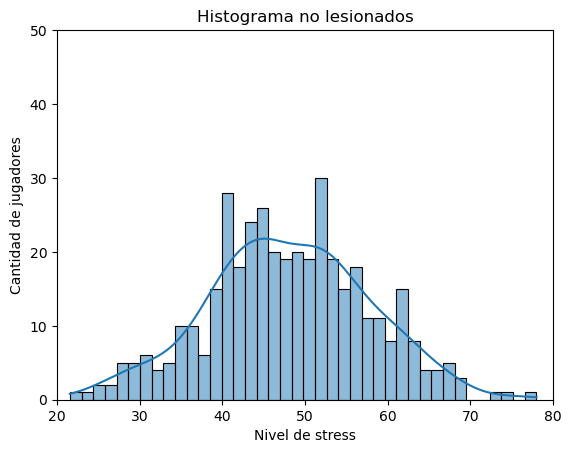

In [9]:
sns.histplot(no_lesion["Stress_Level_Score"], bins=40,kde=True )
plt.title("Histograma no lesionados")
plt.xlabel("Nivel de stress")
plt.ylabel("Cantidad de jugadores")
plt.xlim(20,80)
plt.ylim(0, 50)

In [10]:
lesion = junto_categorias[junto_categorias["Injury_Next_Season"]==True].sort_values(by=["Stress_Level_Score"],ascending=False).reset_index(drop=True)
lesion

,Stress_Level_Score,Injury_Next_Season
0,87.065007,True
1,85.702210,True
2,84.353308,True
3,82.816270,True
4,81.573838,True
...,...,...
395,34.702365,True
396,34.327127,True
397,33.381323,True
398,32.775044,True


(0.0, 30.0)

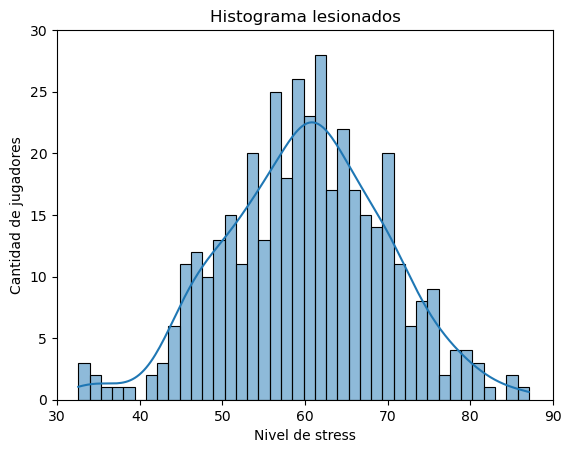

In [11]:
sns.histplot(lesion["Stress_Level_Score"], bins=40, kde = True)
plt.title("Histograma lesionados")
plt.xlabel("Nivel de stress")
plt.ylabel("Cantidad de jugadores")
plt.xlim(30,90)
plt.ylim(0, 30)

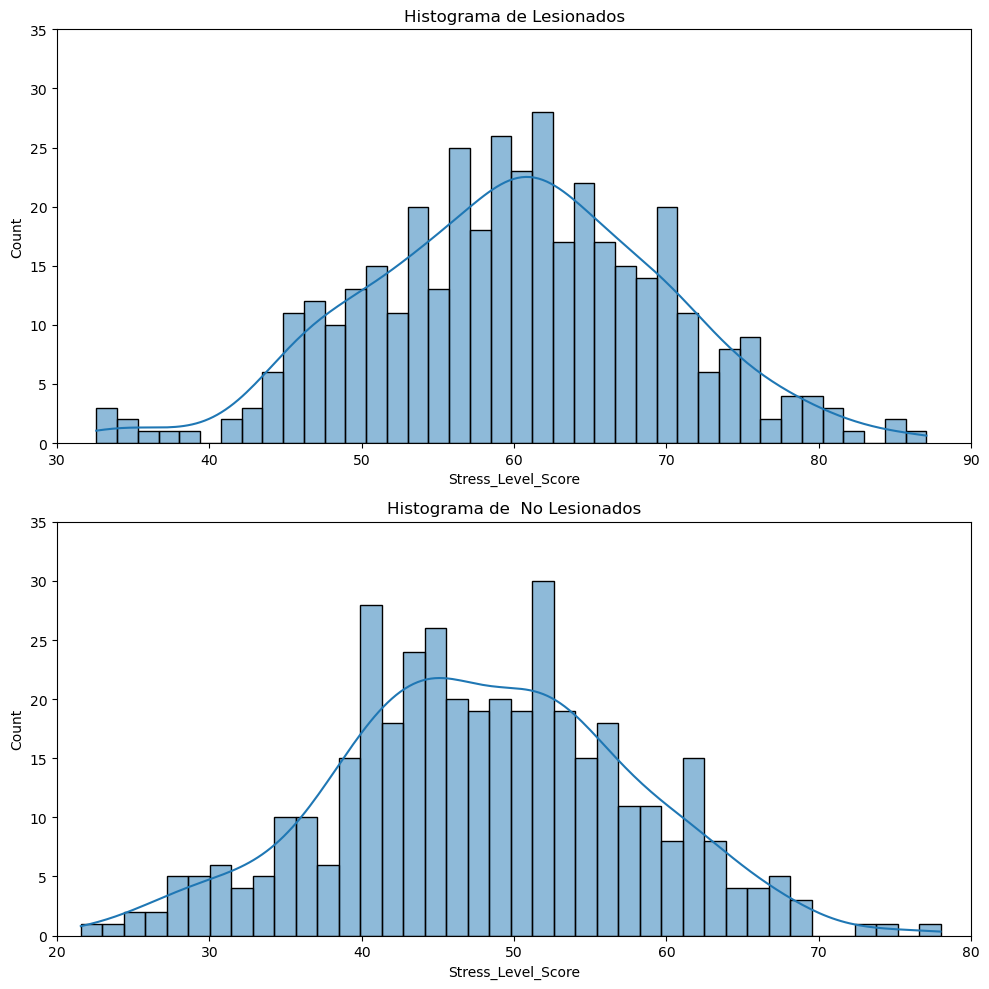

In [12]:
fig, ax =plt.subplots(2, 1, figsize =(10,10))
sns.histplot(x=lesion["Stress_Level_Score"], bins=40, kde=True, ax=ax[0])
ax[0].set_xlim(30, 90)
ax[0].set_ylim(0, 35)
ax[0].set_title("Histograma de Lesionados")

sns.histplot(x=no_lesion["Stress_Level_Score"], bins=40, kde=True, ax=ax[1])
ax[1].set_xlim(20, 80)
ax[1].set_ylim(0, 35)
ax[1].set_title("Histograma de  No Lesionados")
plt.tight_layout()
plt.show()

### Del histograma podemos sacar las primeras conclusiones acerca de la vecindad del nivel de stress que hace que los jugadores sean propensos a lesionarse,primero analizaremos el grafico de los no lesionados,podemos notar que aquellos jugadores que no se lesionan,mayormente su nivel de stress se situa entre los 45 puntos aproximadamente,en cambio los jugadores que se lesionaron la siguiente temporada,su nivel de stress estaba en los 60 puntos aproximadamente.Por lo que esos 15 puntos de diferencia se hacen notar en cuanto a la posibilidad de lesionarse.

<Axes: xlabel='Stress_Level_Score'>

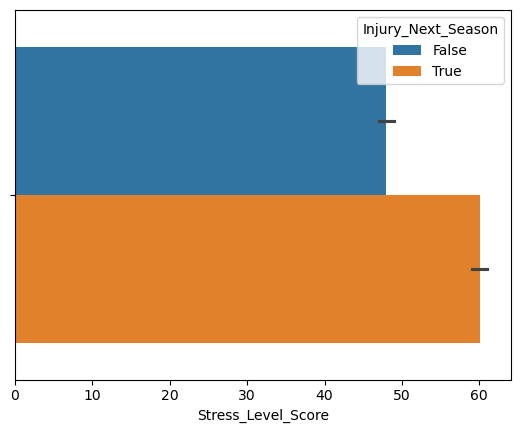

In [14]:
#generamos un barplot no calcula los promedios de lesionados y no lesionados
sns.barplot(data = junto_categorias,x= "Stress_Level_Score", hue="Injury_Next_Season")

### Como notamos del graficos ,podemos afirmar que los supuestos que habiamos planteado en la celda anterior si se cummplian,dando un estimado que los jugadores que se lesionan tienen en promedio 60 puntos en nivel de stress y aquellas que no se lesionan tienen 45 puntos de nivel de strees,por lo que podemos afirmar 2 cosas ,la vecindad donde hace que los jugadores sean propensos a lesionarse es alrededor de los 60 puntos de stress y tambien podemos afirmar que el nivel de stress es un factor importante para el buen desempeño del futbolista en su carrera deportiva.

### Ahora entrenaremos diversos modelos para ver si es posible determinar si es que se puede determinar si un futbolista se lesionara o no la proxima temporada de acuerdo a su nivel de stress.

In [17]:
X_train, X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(640, 1)

In [19]:
X_test.shape

(160, 1)

In [20]:
y_test.shape

(160,)

In [21]:
y_train.shape

(640,)

### Veremos un pequeño desempeño de cada modelo para hacernos una idea de que valores pueden tener como score cada uno.

In [23]:
modelos ={
          "KNN":KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "Tree" :DecisionTreeClassifier(), 
          "REGRESION LOGISTICA":LogisticRegression()            
         }
for nombre, modelo  in modelos.items(): 
    pipeline_=make_pipeline(StandardScaler(), modelo)
    pipeline_.fit(X_train, y_train)
    print(f"{nombre}---->SCORE TRAIN  {pipeline_.score(X_train, y_train)}")
    print(f"{nombre}---->SCORE TEST  {pipeline_.score(X_test, y_test)}")

KNN---->SCORE TRAIN  0.7796875
KNN---->SCORE TEST  0.73125
Random Forest---->SCORE TRAIN  1.0
Random Forest---->SCORE TEST  0.69375
Tree---->SCORE TRAIN  1.0
Tree---->SCORE TEST  0.69375
REGRESION LOGISTICA---->SCORE TRAIN  0.7296875
REGRESION LOGISTICA---->SCORE TEST  0.7625


In [24]:
#escalamos los datos 
scaler = StandardScaler() 
X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)

### Ahora evaluaremos cada modelo con algunos valores para algunos de sus hiperparametros y el GridSearchCV luego de probar las diferentes combinaciones del entrenamiento del modelo hará una validacion cruzada con el kfold,por lo que finalmente nos entregara un promedio que obtiene el modelo y los parametros con los que logra desempeñarse mejor.

In [26]:
#datos escalados
knn = KNeighborsClassifier()
params={"n_neighbors":np.arange(1,30)} #diversos valores de vecinos cercanos
kfold_knn =KFold(n_splits=6, shuffle=True, random_state=42)
grid_knn = GridSearchCV(knn ,params, cv=kfold_knn)
grid_knn.fit(X_train_esc, y_train)
print(grid_knn.best_params_, grid_knn.best_score_)

{'n_neighbors': 29} 0.7233733027684711


In [27]:
#---knn  sin escalar
knn = KNeighborsClassifier()
params={"n_neighbors":np.arange(1,30)}
kfold_knn =KFold(n_splits=6, shuffle=True, random_state=42)
grid_knn = GridSearchCV(knn ,params, cv=kfold_knn)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_, grid_knn.best_score_)

{'n_neighbors': 29} 0.7233733027684711


In [28]:
#datos sin escalar
tree =DecisionTreeClassifier()
kfold_tree = KFold(n_splits=7, shuffle=True, random_state=42)
params_tree ={"max_depth":np.arange(1,10),
    "min_samples_split": np.arange(2,5),
    "min_samples_leaf" : np.arange(1,5)}

grilla_trre = GridSearchCV(tree, params_tree, cv = kfold_tree)
grilla_trre.fit(X_train, y_train)
print(grilla_trre.best_params_, grilla_trre.best_score_)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.7327486178417856


In [29]:
# datos escalados
tree =DecisionTreeClassifier()
kfold_tree = KFold(n_splits=7, shuffle=True, random_state=42)
params_tree ={"max_depth":np.arange(1,10),
    "min_samples_split": np.arange(2,5),
    "min_samples_leaf" : np.arange(1,5)}

grilla_trre = GridSearchCV(tree, params_tree, cv = kfold_tree)
grilla_trre.fit(X_train_esc, y_train)
print(grilla_trre.best_params_, grilla_trre.best_score_)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2} 0.7327486178417856


In [30]:
#random forest escalados
random_forest =RandomForestClassifier() 
k_f_r = KFold(n_splits=6, shuffle=True , random_state=42)
params = {"n_estimators":[100,300 ,500], 
          "max_depth" :[10,15,20]}
grilla_random = GridSearchCV(random_forest, params, cv = k_f_r )
grilla_random.fit(X_train_esc , y_train)
print(grilla_random.best_params_, grilla_random.best_score_)

{'max_depth': 10, 'n_estimators': 300} 0.6296802445188973


In [31]:
#random forest sin escalar
random_forest =RandomForestClassifier() 
k_f_r = KFold(n_splits=6, shuffle=True , random_state=42)
params = {"n_estimators":[100,300 ,500], 
          "max_depth" :[10,15,20]}
grilla_random = GridSearchCV(random_forest, params, cv = k_f_r )
grilla_random.fit(X_train , y_train)
print(grilla_random.best_params_, grilla_random.best_score_)

{'max_depth': 10, 'n_estimators': 100} 0.6265502850761182


In [32]:
#regresion lineal sin escalar
log_reg = LogisticRegression() 
params_rl = {"C": [0.1, 0.001, 1, 10]}
kf_lr = KFold(n_splits=6, shuffle=True , random_state=42)

prueba_lr= GridSearchCV(log_reg, params_rl, cv = kf_lr )
prueba_lr.fit(X_train , y_train)
print(prueba_lr.best_params_, prueba_lr.best_score_)

{'C': 0.1} 0.7374507729383412


In [33]:
#regresion lineal escalados
log_reg = LogisticRegression() 
params_rl = {"C": [0.1, 0.001, 1, 10]}
kf_lr = KFold(n_splits=6, shuffle=True , random_state=42)

prueba_lr= GridSearchCV(log_reg, params_rl, cv = kf_lr )
prueba_lr.fit(X_train_esc , y_train)
print(prueba_lr.best_params_, prueba_lr.best_score_)

{'C': 1} 0.7374507729383412


### Finalmente con los resultados notamos que el modelo con mejor puntuacion es el de regresion logistica con los parametros predeterminados,por lo que no tendremos que modificar sus parametros.

### En el modelo de regresion logistica usaremos un pipeline por comodidad, aunque ya tengamos los datos escalados.
### ¿Que hace un pipeline? : Automatiza el proceso de escalar los datos para entrenar el modelo,pudiendonos ahorrar un par de lineas de codigo.

In [36]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

0.7296875

In [37]:
pipeline.score(X_test, y_test)

0.7625

### Notamos que el modelo tiene una precision del 76.25 % .Ahora analizaremos sus metricas 

              precision    recall  f1-score   support

       False       0.78      0.74      0.76        80
        True       0.75      0.79      0.77        80

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



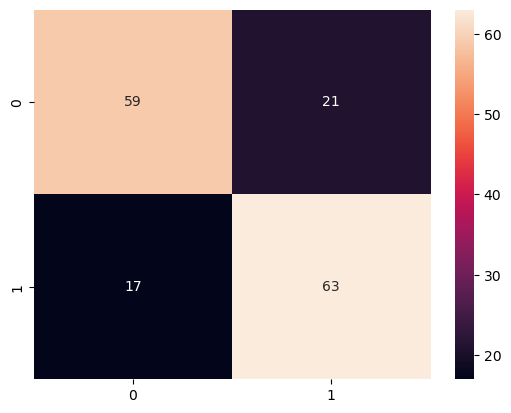

In [39]:

y_pred = pipeline.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print(classification_report(y_test, y_pred))


###  De acuerdo a la matriz de confusion y al reporte de clasificacion ,podemos afirmar que el modelo tiene buenas metricas,esto ya que aprendio a identificar cuando un futbolista se va a lesionar,podemos notar que de los 80 casos, clasifica correctamente a 63 futbolistas,por lo que acierta 3 de cada 4 casos.Tambien es importante notar que clasifico a 21 futbolistas como posibles lesionados,por lo que puede generar casos de preocupacion innecesaria a los futbolista,teniendo el efecto contrario en estos, pudiendo generar aun mas estres debido a que se intentara hacer las cosas a la perfeccion tratando de evitar su destino de lesion que supuestamente el modelo habia predicho de una lesion.